# Linear Regression
The goal of Linear Regression is to fit $\hat{y} = \theta X$ to y and find $\theta$ that minimizes the differences between the actual value ($y$) and the prediction ($\hat{y}$). Here, given n features, we set $\theta$ to be (n+1) dimensional vector such that $\theta_0$ is the intercept. We need to modify $X$ accordingly, by concaternating (m) dimensional $1$ vector to it. To accomplish the goal using gradient descent, we first need to come up with a cost function, L. For logistic regression, this is the least square: 

 <div style="text-align:center">
$L = \frac{1}{2m}\sum_{i=1}^{m}(\hat{y_i}-{y_i})^2$ .<br>
</div>

Here $m$ is the number of samples, so the above two equations show that you need to go over the whole samples to compute the cost function. <br>
In Machine learning implementation, the algorithm starts at a initial value $\theta_{init}$. Then, the loss function can be calculated at those values: Using gradient descent, we calculate the slope of the likelihood in the parameter space,

 <div style="text-align:center">
$\frac{\partial L}{\partial \theta} = \frac{1}{m}\sum_{i=1}^{m}(\hat{y_i}-{y_i})x_i$<br></div>

and using a given learning rate, $\alpha$, we update our prediction of parameters $\theta$ until the solution converges (or reaches the given number of iteration).

 <div style="text-align:center">
$\theta = \theta - \alpha \frac{\partial L}{\partial \theta} =  \theta - \alpha\frac{1}{m}\sum_{i=1}^{m}(\hat{y_i}-{y_i})x_i$<br></div>

After understanding this, the implementation is fairly straightforward. Let's do this!

In [0]:
import numpy as np

In [0]:
def cost(X,y,theta,m,beta):
    # when we implement, we concatenate ones to X so that theta can include the intercept term.
    # Thus, the dimensionality of the matrices are:
    # X (m x (n+1)), y=(m x 1), theta=((n+1) x 1)
    return np.sum(((np.dot(X,theta)-y)*(np.dot(X,theta)-y).T))/(2.*m)

In [0]:
def slope(X,y,theta,m,beta):
    return np.dot(X.T,(np.dot(X,theta)-y))/m

In [0]:
def LinearRegression(X,y,alpha = 0.01,niter =500, beta=0):
    m,n = X.shape
    o = np.ones((m,1))
    X = np.concatenate((o,X),axis=1)
    theta = np.ones((n+1,1))
    L = []
    L.append(cost(X,y,theta,m,beta))
    for i in range(niter):
        theta -= alpha*slope(X,y,theta,m,beta)
        L.append(cost(X,y,theta,m,beta))
    return [theta,L]       

# Test case

In [0]:
m=100
x = np.array([0.1*i for i in range(m)])
print(len(x))
np.random.seed(10)  #Setting seed for reproducability
y = x + np.random.normal(0,1,len(x))+5 #Adding Gaussian noise with mean 0 and std 1
x = x.reshape((m,1))
y = y.reshape((m,1))
# The following two lines are to add ones to X so that the bias term can be absorbed into the theta term.
o = np.ones((m,1))
X = np.concatenate((o,x),axis=1)
X.shape

100


(100, 2)

In [0]:
import matplotlib.pyplot as plt

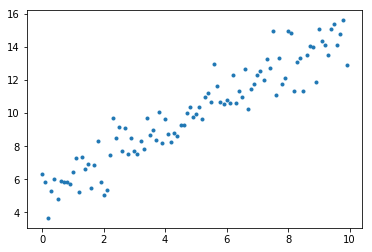

In [0]:
plt.plot(x,y,'.')
# Our data!

In [0]:
n = 3000
theta,L = LinearRegression(x,y,niter = n,alpha=0.02)

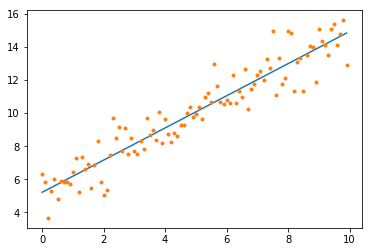

In [0]:
plt.plot(x,np.dot(X,theta))
plt.plot(x,y,'.')

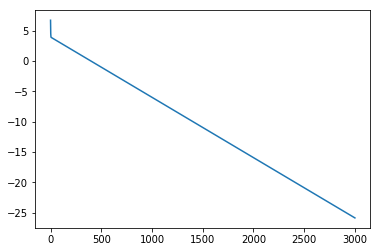

In [0]:
plt.plot(range(n+1),np.log(L))
# This shows the loss function in log scale as a function of iteration. 
# The initial oscillation is due to overshooting, which can be controlled by reducing alpha.

To double-check the result, we analytically solve the equation:

$\theta = (X^TX)^{-1}X^Ty$


In [0]:
from numpy.linalg import inv

In [0]:
print(theta)
print(np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y))

[[5.20817235]
 [0.97398868]]
[[5.20817371]
 [0.97398848]]


Our solution is fairly close to the analytic solution! yay!

# Regularization
Here we assume two types of regularizations: Lasso (L1) and Ridge (L2) regression. The type of regularization determines what terms will be added to the loss function on top of linear regression loss, to prevent parameters from blowing up. Each regularization is defined as follows:

<div style="text-align:center">
$L_{reg,L1} = L_{Linear Regression}+\frac{\lambda}{m} \sum_{i=0}^{n}|{\theta_i}|$  (Lasso),<br>
$L_{reg,L2} = L_{Linear Regression}+\frac{\lambda}{2m} \sum_{i=0}^{n}({\theta_i})^2$  (Ridge),<br></div>

where n is the number of features (starting from 0 to include the bias term).

In this case, both cost function and the partial derivative of the cost function should be updated:

 <div style="text-align:center">
 $\frac{\partial L_{reg,L1}}{\partial \theta} = \frac{1}{m}\sum_{i=1}^{m}(\hat{y_i}-{y_i})x_i + \frac{\lambda}{m}\frac{\theta}{|\theta|}$<br>
$\frac{\partial L_{reg,L2}}{\partial \theta} = \frac{1}{m}\sum_{i=1}^{m}(\hat{y_i}-{y_i})x_i + \frac{\lambda}{m}\theta$<br></div>

Using previous implementation of linear regression, again, it is straight forward to implement the regularization.

In [0]:
def cost_L2(X,y,theta,m,beta):
    # when we implement, we concatenate ones to X so that theta can include the intercept term.
    # Thus, the dimensionality of the matrices are:
    # X (m x (n+1)), y=(m x 1), theta=((n+1) x 1)
    return np.sum(((np.dot(X,theta)-y)*(np.dot(X,theta)-y).T))/(2.*m)+beta*np.sum(np.dot(theta.T,theta)/(2.*m))

In [0]:
def slope_L2(X,y,theta,m,beta):
    a = np.dot(X.T,(np.dot(X,theta)-y))/m+beta/m*theta
    # as we do not want to regularize the intercept, we remove the regularization term from it
    a[0] -= beta/m*theta[0]
    return a

In [0]:
def cost_L1(X,y,theta,m,beta):
    # when we implement, we concatenate ones to X so that theta can include the intercept term.
    # Thus, the dimensionality of the matrices are:
    # X (m x (n+1)), y=(m x 1), theta=((n+1) x 1)
    return np.sum(((np.dot(X,theta)-y)*(np.dot(X,theta)-y).T))/(2.*m)+beta*np.sum(np.abs(theta))/m

In [0]:
def slope_L1(X,y,theta,m,beta):
    a = np.dot(X.T,(np.dot(X,theta)-y))/m+beta/m*np.sign(theta)
    # as we do not want to regularize the intercept, we remove the regularization term from it
    a[0] -= beta/m*np.sign(theta[0])
    return a

In [0]:
def LinearRegression_reg(X,y,alpha = 0.01,niter =500, beta=0.1, reg = 'L2'):
    m,n = X.shape
    o = np.ones((m,1))
    X = np.concatenate((o,X),axis=1)
    theta = np.ones((n+1,1))
    L = []
    if reg == 'L2':
        cost_reg = cost_L2
        slope_reg = slope_L2
    elif reg == 'L1':
        cost_reg = cost_L1
        slope_reg = slope_L1
    elif reg == 'None':
        cost_reg = cost
        slope_reg = slope
    L.append(cost_reg(X,y,theta,m,beta))
    for i in range(niter):
        theta -= alpha*slope_reg(X,y,theta,m,beta)
        L.append(cost_reg(X,y,theta,m,beta))
    return [theta,L]      

In [0]:
n = 3000
theta_reg,L_reg = LinearRegression_reg(x,y,niter = n,alpha=0.02,beta=0.001,reg='L1')

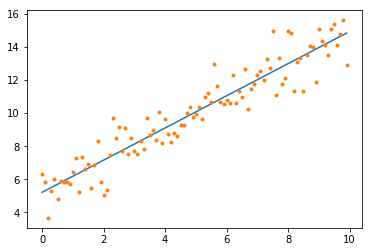

In [0]:
plt.plot(x,np.dot(X,theta_reg))
plt.plot(x,y,'.')

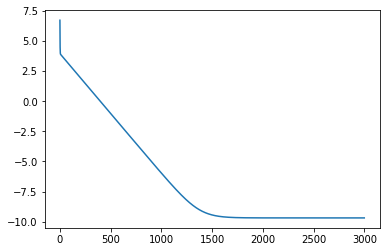

In [0]:
plt.plot(range(n+1),np.log(L_reg))
# This shows the loss function in log scale as a function of iteration. 
# Comparing this to Linear Regression only case, we see that the loss function 
# converges a lot earlier and smoother.

In [0]:
print(theta_reg)
print(np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y))

[[5.20817829]
 [0.97398748]]
[[5.20817371]
 [0.97398848]]


# Polynomial Regression
Linear regression works pretty well as long as the relation between the feature and the dependent variable is linear. One can extend this by adding polynomial features ($x_1 = x$, $x_2 = x^2$, $x_3 = x^3$,...) to add complexity, which we show here in the test case below where we fit sine function using 5th order polynomial. Going too much, we will run into overfitting problem, but 5th seems to be a reasonable compromise.

## test case

In [0]:
m = 100
x1 = np.array([i*np.pi/180 for i in range(0,300,3)])
np.random.seed(10)  #Setting seed for reproducability
y = np.sin(x1) + np.random.normal(0,0.1,len(x1))
x1.shape

(100,)

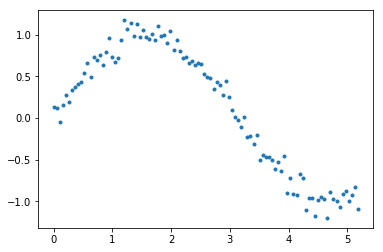

In [0]:
plt.plot(x1,y,'.')
# Our data!

In [0]:
# Adding polynomials to the feature
x2 = np.power(x1,2)
x2 = (x2-x2.mean())/x2.std()
x3 = np.power(x1,3)
x3 = (x3-x3.mean())/x3.std()
#x4 = np.power(x1,4)
#x4 = (x4-x4.mean())/x4.std()
#x5 = np.power(x1,5)
#x5 = (x5-x5.mean())/x5.std()
x1 = x1.reshape((m,1))
x2 = x2.reshape((m,1))
x3 = x3.reshape((m,1))
#x4 = x4.reshape((m,1))
#x5 = x5.reshape((m,1))
y = y.reshape((m,1))
# The following two lines are to add ones to X so that the bias term is absorbed into the theta term.
o = np.ones((m,1))
X = np.concatenate((o,x1,x2,x3),axis=1)
x = np.concatenate((x1,x2,x3),axis=1)

print(X.shape,x.shape)

(100, 4) (100, 3)


In [0]:
n = 30000
theta_reg,L_reg = LinearRegression_reg(x,y,niter = n,alpha=0.08,beta=0.001,reg='L2')

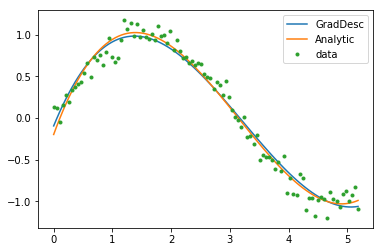

In [0]:
plt.plot(x1,np.dot(X,theta_reg),label='GradDesc')
plt.plot(x1,np.dot(X,np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y)),label='Analytic')
plt.plot(x1,y,'.',label='data')
plt.legend()

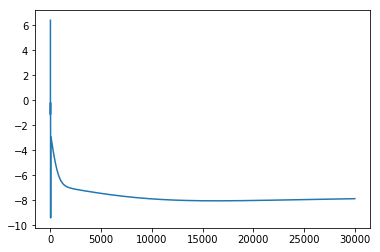

In [0]:
plt.plot(range(n+1),np.log(L_reg))
# This shows the loss function in log scale as a function of iteration. 
# Comparing this to Linear Regression only case, we see that the loss function 
# converges a lot earlier and smoother.

In [0]:
#compare the param values
print(theta_reg)
print(np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y))

[[-4.34494931]
 [ 1.71817774]
 [-6.4191195 ]
 [ 3.28741525]]
[[-4.91989276]
 [ 1.93981351]
 [-7.24449606]
 [ 3.79498834]]


# Logistic Regression

The name is misleading, but logistic regression is actually a classification algorithm. We estimate $\hat{y}$ as $\hat{y} = \frac{1}{1+exp(-\theta X)}$, which can be understood as sigmoid ($sigmoid(x) = 1/(1+exp(-x))$) "activation" applied to the previous estimate of $\hat{y} = \theta X$ (linear regression). The characteristic of sigmoid is that it gives values between 0 and 1, which can be interpreted as the **probability** of classification, while the decision boundary is determined by $\theta X = sigmoid^{-1}(threshold)$. With this new $\hat{y}$, we define our new loss function L as

 <div style="text-align:center"><br>
$L = \frac{1}{m}\sum_{i=1}^{m}(-y_ilog(\hat{y_i})-(1-y_i)(1-log(\hat{y_i}))$.<br>
</div>

In this case, the partial derivative of the loss function with respect to $\theta$ becomes

 <div style="text-align:center"><br>
$\frac{\partial L}{\partial \theta} = \frac{1}{m}\sum_{i=1}^{m}(\hat{y_i}-{y_i})x_i$.<br></div>

Then the rest is pretty much identical to the previous steps.

In [0]:
def sigmoid(x):
    # X = (m x (n+1)), theta = ((n+1),1)
    # return (m x 1)
    return 1./(1+np.exp(-x))

Text(0,0.5,'probability')

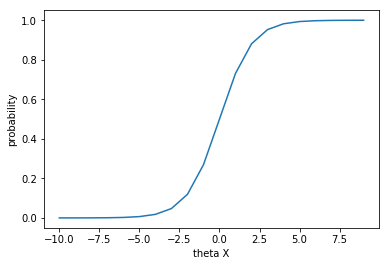

In [0]:
x = np.array([i for i in range(-10,10)])
y = sigmoid(x)
plt.plot(x,y)
plt.xlabel('theta X')
plt.ylabel('probability')
#plot sigmoid to show how it behaves

In [0]:
def cost_log(X,y,theta,m,beta):
    a = y*np.log(sigmoid(np.dot(X,theta)))
    b = (1-y)*np.log(1.-sigmoid(np.dot(X,theta)))
    return 1./m*np.sum(-a-b)

In [0]:
def slope_log(X,y,theta,m,beta):
    # ((n+1) x m), (m x 1)
    return np.dot(X.T,(sigmoid(np.dot(X,theta))-y))/m

In [0]:
def LogisticRegression(X,y,alpha = 0.01,niter =500, beta=0):
    m,n = X.shape
    y = y.reshape(m,1)
    o = np.ones((m,1))
    X = np.concatenate((o,X),axis=1)
    theta = np.ones((n+1,1))
    L = []
    L.append(cost_log(X,y,theta,m,beta))
    for i in range(niter):
        theta -= alpha*slope_log(X,y,theta,m,beta)
        L.append(cost_log(X,y,theta,m,beta))
    return [theta,L]       

# test case
I refer to the test case created by
https://beckernick.github.io/logistic-regression-from-scratch/

In [0]:
np.random.seed(12)
num_observations = 500

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = (np.hstack((np.zeros(num_observations),
                              np.ones(num_observations))))

In [0]:
o = np.ones((num_observations*2,1))
X = np.concatenate((o,simulated_separableish_features),axis=1)

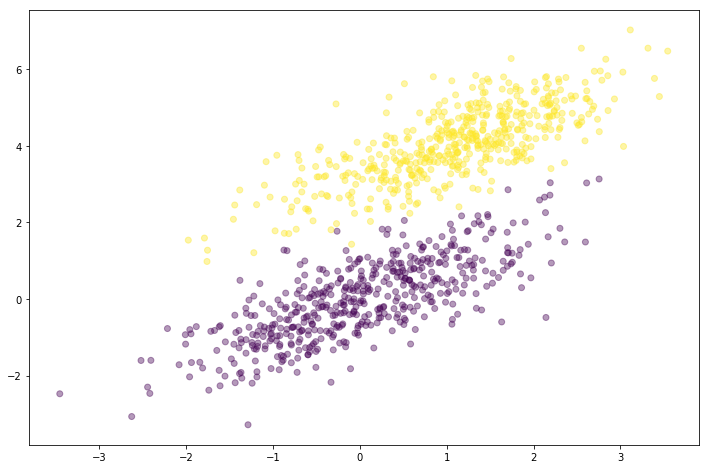

In [0]:
# Let's see how the data look like!
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4)

In [0]:
theta_log,L_log = LogisticRegression(simulated_separableish_features,simulated_labels,alpha = 1,niter =50000, beta=0)

In [0]:
final_scores = np.dot(X,theta_log)
# here we can decide threshold and make predictions. we decided round as threshold is simply 0.5
preds = np.round(sigmoid(final_scores))

In [0]:
# calculate the decision boundary based on theta_log
x = np.array([i for i in range(-3,4)])
y = (-theta_log[0]-theta_log[1]*x)/theta_log[2]

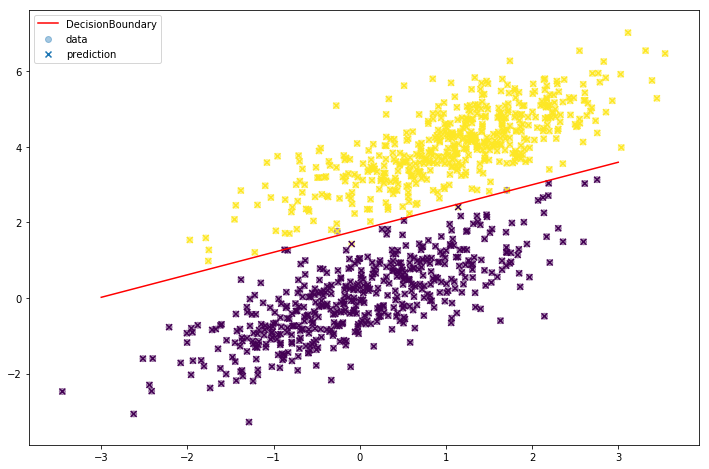

In [0]:
plt.figure(figsize=(12,8))
# plot original data as circles
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4,label='data')
# plot prediction as x: misclassified ones will appear as circle with x in different colors
plt.scatter(simulated_separableish_features[:, 0].reshape(1000,1), simulated_separableish_features[:, 1].reshape(1000,1),
            c = preds,marker = 'x',label='prediction')
# plot the final decision boundary
plt.plot(x,y,color='r',label='DecisionBoundary')
plt.legend()

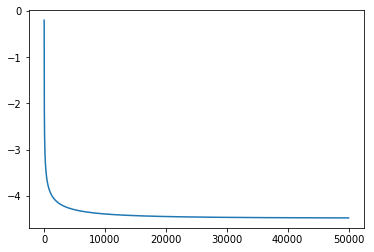

In [0]:
plt.plot(range(50000+1),np.log(L_log))
# This shows the loss function in log scale as a function of iteration. 
